# Avocado Project

Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [161]:
df=pd.read_csv('/Users/rekhagrg/Downloads/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
print(df.head())

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0         0.0  27-12-2015          1.33      64236.62  1036.74   54454.85   
1         1.0  20-12-2015          1.35      54876.98   674.28   44638.81   
2         2.0  13-12-2015          0.93     118220.22   794.70  109149.67   
3         3.0  06-12-2015          1.08      78992.15  1132.00   71976.41   
4         4.0  29-11-2015          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

     year  region  
0  2015.0  Albany  
1  2015.0  Albany  
2  2015.0  Albany  


In [163]:
df.shape

(16468, 14)

In [164]:
df['region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [165]:
df['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64

In [166]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB
None


In [167]:
print(df.describe())

        Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  1517.000000   1517.000000  1.517000e+03  1.517000e+03  1.517000e+03   
mean     26.995386      1.074990  1.601879e+06  6.464387e+05  6.114375e+05   
std      14.848287      0.188891  4.433143e+06  1.947614e+06  1.672906e+06   
min       0.000000      0.490000  3.875074e+04  4.677200e+02  1.783770e+03   
25%      14.000000      0.980000  1.474700e+05  2.040034e+04  4.147606e+04   
50%      29.000000      1.080000  4.027919e+05  8.175117e+04  1.186649e+05   
75%      39.000000      1.190000  9.819751e+05  3.775785e+05  4.851503e+05   
max      51.000000      1.680000  4.465546e+07  1.893304e+07  1.895648e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.517000e+03  1.517000e+03  1.517000e+03  1.517000e+03    1517.000000   
mean   5.040550e+04  2.935974e+05  2.487736e+05  4.264205e+04    2181.771074   
std    1.377812e+05  7.579765e+05  6.474765e+05  1.182157

In [168]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [169]:
#check for missing value
print(df.isnull().sum())

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64


In [170]:
new_df=df.dropna()

In [171]:
new_df


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


# Data Preprocessing

In [172]:
# #lets convert categorical variable to numerical using label encoder
# Label_encoder=LabelEncoder()
# y_class=Label_encoder.fit_transform(y_class)

In [173]:
new_df['Date']=pd.to_datetime(new_df['Date'])

/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '20-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-12-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/rekhagrg/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing

In [174]:
new_df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [175]:
X=new_df.drop(['region','Date','type'], axis=1)
y=new_df['region']

In [176]:
X.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

In [177]:
y

0          Albany
1          Albany
2          Albany
3          Albany
4          Albany
          ...    
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, Length: 1517, dtype: object

In [178]:
#Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [179]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((1213, 11), (1213,), (304, 11), (304,))

In [180]:
new_df.dtypes

Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [181]:
new_df.isna().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [182]:
new_df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

# Classification 

In [183]:
#choose and train a calssification model 
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train
        ,y_train)


RandomForestClassifier(random_state=42)

In [184]:
#tEvaluate in classification model
traning_pred=clf.predict(X_train)
y_class_pred=clf.predict(X_test)
classification_accuracy=accuracy_score(y_test,y_class_pred)
training_accuracy=accuracy_score(y_train,traning_pred)

In [185]:
print("Training accuracy:",training_accuracy)
print("Testing accuracy:",classification_accuracy)

Training accuracy: 1.0
Testing accuracy: 0.9736842105263158


In [189]:
# hyperparameter tuning
np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators....")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100}")

Trying model with 10 estimators....
Model accuracy on test set: 93.42105263157895
Trying model with 20 estimators....
Model accuracy on test set: 98.02631578947368
Trying model with 30 estimators....
Model accuracy on test set: 97.36842105263158
Trying model with 40 estimators....
Model accuracy on test set: 97.69736842105263
Trying model with 50 estimators....
Model accuracy on test set: 97.03947368421053
Trying model with 60 estimators....
Model accuracy on test set: 96.38157894736842
Trying model with 70 estimators....
Model accuracy on test set: 97.36842105263158
Trying model with 80 estimators....
Model accuracy on test set: 96.38157894736842
Trying model with 90 estimators....
Model accuracy on test set: 98.02631578947368


In [190]:
tuned_clf=RandomForestClassifier(n_estimators=90,random_state=42)
tuned_clf.fit(X_train
        ,y_train)

RandomForestClassifier(n_estimators=90, random_state=42)

In [191]:
final_pred=tuned_clf.predict(X_test)
final_accuracy=accuracy_score(y_test,final_pred)
print("Accuracy:",final_accuracy)

Accuracy: 0.9835526315789473


In summary after doing hyperparameter tuning, i got best estimetor with 90 which output accuracy is  98%

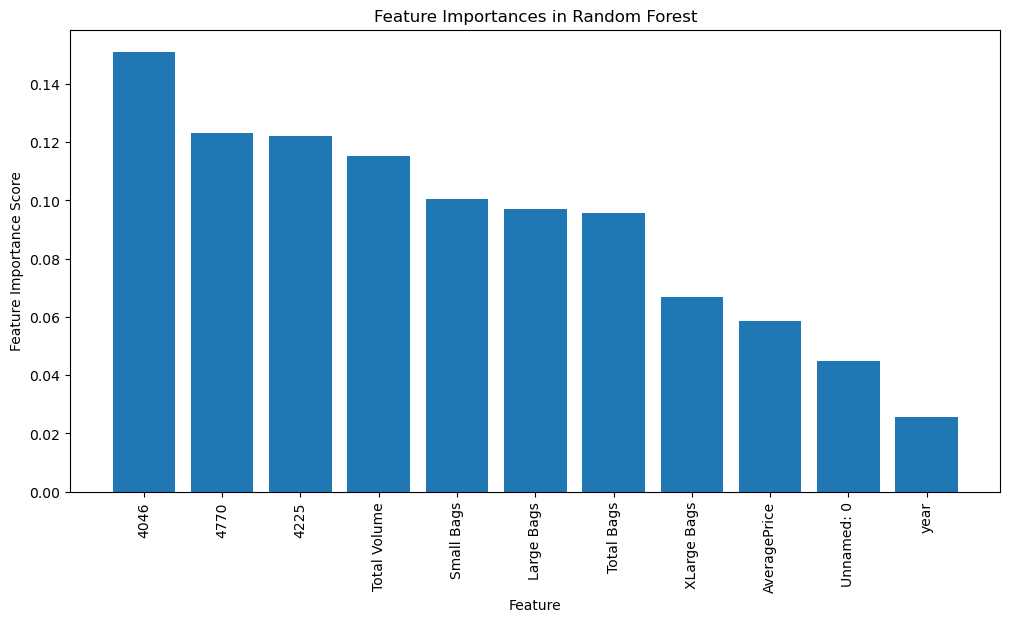

In [146]:
feature_importances = clf.feature_importances_
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = X.columns[sorted_indices]  # Assuming X is your feature matrix

# Create a bar plot of feature importances
plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importances in Random Forest')
plt.xticks(rotation=90)
plt.show()


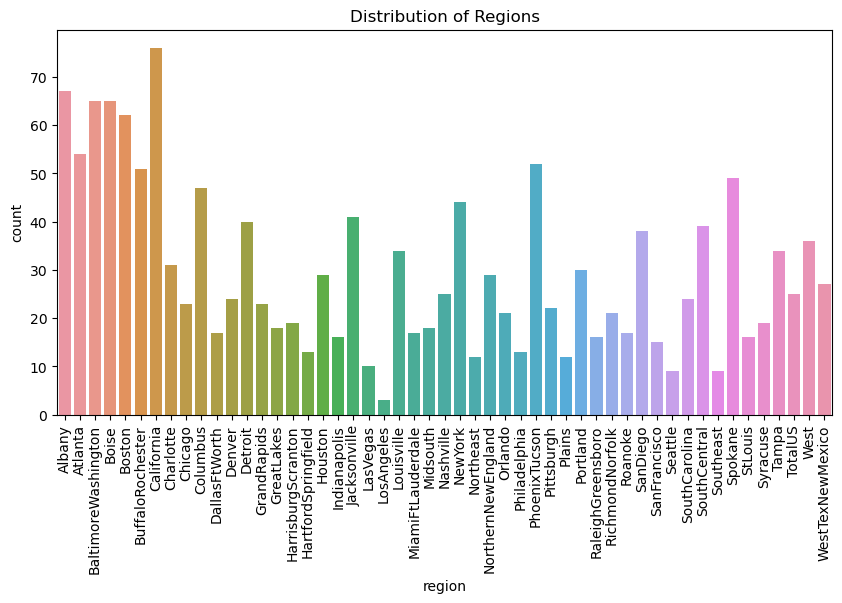

In [147]:
# Visualize the target variable
plt.figure(figsize=(10, 5))
sns.countplot(x='region', data=df)
plt.title('Distribution of Regions')
plt.xticks(rotation=90)
plt.show()

In Summary of this classification 

# Regression Task

#split the data into train and test sets

In [148]:
X=new_df.drop(['AveragePrice','Date','type'], axis=1)
y=new_df['AveragePrice']


In [149]:
#Initialize Linear models
lr_model=LinearRegression()
# Initialize RandomForestRegressor models
rf_model=RandomForestRegressor(random_state=42)


Train the models

In [150]:
#lets convert categorical variable to numerical using label encoder
Label_encoder=LabelEncoder()


In [151]:
new_df.dtypes


Unnamed: 0             float64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

In [152]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["region"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")
transform_X=transformer.fit_transform(X)
transform_X

<1517x61 sparse matrix of type '<class 'numpy.float64'>'
	with 15727 stored elements in Compressed Sparse Row format>

In [153]:

X_train, X_test, y_train, y_test = train_test_split(transform_X, y, test_size=0.2, random_state=42)

In [154]:
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [155]:

#Lets make predictions
lr_pred=lr_model.predict(X_test)
rf_pred=rf_model.predict(X_test)

In [156]:
#Evaluate Linear Regression and Random Forest
lr_mse=mean_squared_error(y_test,lr_pred)
lr_r2=r2_score(y_test,lr_pred)

rf_mse=mean_squared_error(y_test,rf_pred)
rf_r2=r2_score(y_test,rf_pred)

print("Linear Regression MSE:",lr_mse)
print("Linear Regression R2:",lr_r2)
print("Random Forest MSE:",rf_mse)
print("Random Forest R2:",rf_r2)


Linear Regression MSE: 0.03014149482750485
Linear Regression R2: 0.14109020350533286
Random Forest MSE: 0.004710972730263165
Random Forest R2: 0.8657564711969788


In summary

-The Random Forest model outperforms the Linear Regression model in terms of predictive accuracy, as evidenced by the significantly lower MSE.
-The Random Forest model also provides a much better fit to the data, as indicated by the high R2 value, which implies that it captures a larger portion of the variance in the target variable.

Therefore, based on these performance metrics, the Random Forest Regression model is likely the better choice for making predictions on your dataset, as it provides more accurate and explanatory results compared to Linear Regression